<a href="https://colab.research.google.com/github/Sifat-1/CNN/blob/main/RNN(LSTM)33.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip '/content/drive/MyDrive/uthsoboshu/ugbabsirbengprojdtaset.zip' -d '/content/sample_data/d2'

Streaming output truncated to the last 5000 lines.
  inflating: /content/sample_data/d2/ugbabsirbengprojdtaset/mynewbendgit_traindata/nipu_dgt_7__1725.tif  
  inflating: /content/sample_data/d2/ugbabsirbengprojdtaset/mynewbendgit_traindata/nipu_dgt_7__1726.tif  
  inflating: /content/sample_data/d2/ugbabsirbengprojdtaset/mynewbendgit_traindata/nipu_dgt_7__1727.tif  
  inflating: /content/sample_data/d2/ugbabsirbengprojdtaset/mynewbendgit_traindata/nipu_dgt_7__1728.tif  
  inflating: /content/sample_data/d2/ugbabsirbengprojdtaset/mynewbendgit_traindata/nipu_dgt_7__1729.tif  
  inflating: /content/sample_data/d2/ugbabsirbengprojdtaset/mynewbendgit_traindata/nipu_dgt_7__173.tif  
  inflating: /content/sample_data/d2/ugbabsirbengprojdtaset/mynewbendgit_traindata/nipu_dgt_7__1730.tif  
  inflating: /content/sample_data/d2/ugbabsirbengprojdtaset/mynewbendgit_traindata/nipu_dgt_7__1731.tif  
  inflating: /content/sample_data/d2/ugbabsirbengprojdtaset/mynewbendgit_traindata/nipu_dgt_7__1732.ti

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Activation,Input, Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import Model
#from keras.preprocessing.image import ImageDataGenerator
#from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import tensorflow as tf
from tensorflow.python.tools import freeze_graph
from tensorflow.python.tools import optimize_for_inference_lib
from keras.optimizers import *
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt
#import matplotlib
import os
import theano
from PIL import Image
from numpy import *
# SKLEARN
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
path='/content/sample_data/d2/ugbabsirbengprojdtaset/mynewbendgit_testdata'
images=[]
classNo=[]
testRatio=0.2
valRatio=0.2
imgDimension=(32,32,3)

In [ ]:
img_rows , img_cols = 28 , 28


listing = os.listdir(path)

num_samples =size(listing)
print(num_samples)

for file in listing:
    im= Image.open(path + '/' + file)
    img = im.resize ((img_rows,img_cols))
    gray = img.convert('L')

    gray.save(path + '/' + file, "JPEG" )

imlist= os.listdir(path)
im1 =array(Image.open('/content/sample_data/d2/ugbabsirbengprojdtaset/mynewbendgit_testdata' + '/' + imlist[0]))



immatrix=array ([array(Image.open('/content/sample_data/d2/ugbabsirbengprojdtaset/mynewbendgit_testdata' + '/' + im2)).flatten()
                    for im2 in imlist] ,'f')


4000


[0 0 0 ... 1 1 1]


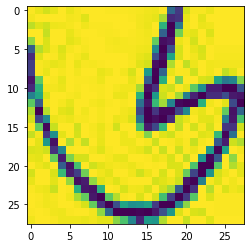

In [ ]:
m,n = immatrix.shape[0:2]

label = np.ones((num_samples,), dtype = int64 )
label[0:100]=0
label[401:500]=1
label[800:900]=2
label[1201:1300]=3
label[1601:1700]=4
label[2001:2100]=5
label[2401:2500]=6
label[2801:2900]=7
label[3201:3300]=8
label[3601:3700]=9
print(label)
data,Label = shuffle(immatrix,label,random_state=2)
train_data = [data,Label]
(X, y) = (train_data[0],train_data[1])

plt.imshow(data[67].reshape(28,28))

[[251. 234. 255. ... 251. 251. 251.]
 [255. 247. 240. ... 248. 245. 243.]
 [221. 255. 240. ... 252. 225. 211.]
 ...
 [255. 249. 254. ... 239. 244. 248.]
 [250. 254. 216. ... 251. 251. 251.]
 [254. 253. 253. ... 255. 255. 255.]] (3200,)
(4000, 784)
(4000,)


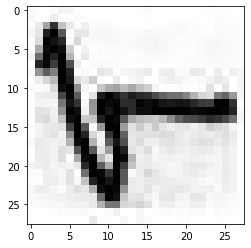

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(X_train,y_train.shape)
import matplotlib.pyplot as plt

plt.imshow(immatrix[16].reshape(img_rows,img_cols))
plt.imshow(immatrix[16].reshape(img_rows,img_cols),cmap='gray')
print (train_data[0].shape)
print (train_data[1].shape)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
X_train /= 255
X_test /= 255
print('x_train shape:', X_train.shape)
print('Number of images in X_train', X_train.shape[0])
print('Number of images in X_test', X_test.shape[0])

x_train shape: (3200, 28, 28, 1)
Number of images in X_train 3200
Number of images in X_test 800


In [ ]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import tensorflow as tf

import tensorflow.keras.layers as KL
tf.keras.layers.LSTM

keras.layers.recurrent_v2.LSTM

In [ ]:
inputs = KL.Input(shape=(28, 28))
x = KL.LSTM(64, activation ='relu')(inputs)
outputs = KL.Dense(10, activation="softmax")(x)


In [ ]:
model = tf.keras.models.Model(inputs, outputs)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                23808     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 24,458
Trainable params: 24,458
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
my_model=model.fit(x=X_train,y=y_train, epochs=200)

Epoch 1/200
100/100 [==============================] - 2s 12ms/step - loss: 1.0944 - accuracy: 0.7609
Epoch 2/200
100/100 [==============================] - 1s 12ms/step - loss: 1.0168 - accuracy: 0.7844
Epoch 3/200
100/100 [==============================] - 1s 13ms/step - loss: 1.0072 - accuracy: 0.7844
Epoch 4/200
100/100 [==============================] - 1s 12ms/step - loss: 1.0045 - accuracy: 0.7844
Epoch 5/200
100/100 [==============================] - 1s 12ms/step - loss: 1.0040 - accuracy: 0.7844
Epoch 6/200
100/100 [==============================] - 1s 12ms/step - loss: 1.0051 - accuracy: 0.7844
Epoch 7/200
100/100 [==============================] - 1s 12ms/step - loss: 1.0030 - accuracy: 0.7844
Epoch 8/200
100/100 [==============================] - 1s 12ms/step - loss: 1.0020 - accuracy: 0.7844
Epoch 9/200
100/100 [==============================] - 1s 12ms/step - loss: 0.9995 - accuracy: 0.7844
Epoch 10/200
100/100 [==============================] - 1s 12ms/step - loss: 0.997

In [ ]:
model.evaluate(X_test, y_test)

25/25 [==============================] - 0s 5ms/step - loss: 1.8125 - accuracy: 0.7038


[1.812526822090149, 0.7037500143051147]

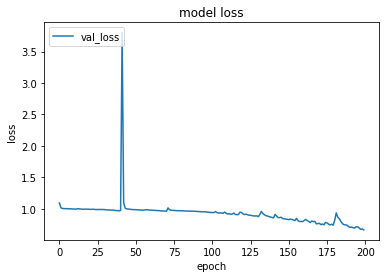

In [ ]:

import matplotlib.pyplot as plt


def plot_hist(my_model):
    #plt.plot(Model.history["accuracy"])

    plt.plot(my_model.history["loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["val_loss","loss"], loc="upper left")
    plt.show()
plot_hist(my_model)

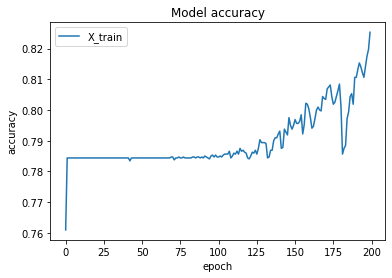

In [ ]:
import matplotlib.pyplot as plt


def plot_hist(my_model):
    #plt.plot(Model.history["accuracy"])

    plt.plot(my_model.history["accuracy"])
    plt.title("Model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["X_train", "validation"], loc="upper left")
    plt.show()
plot_hist(my_model)